# Исследование надежности заемщиков


__Описание проекта:__  
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

__Описание данных:__  
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

__Особенности выполнения работы:__  
Данная проектная работа состоит из двух частей. В первой необходимо выполнить ряд небольших тестовых заданий, имитирующих структуру исследовательского проекта. Структура второй части проекта определяется учащимся самостоятельно.

Задания первой части будут проверены в тренажёре автоматически.

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
# импорт библиотек
import pandas as pd

# чтение данных из файла по сокращенному и полному путям
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
# обзор данных
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
# выяснение типов данных и наличия пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
# оценка числа пропусков
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
# заполнение пропусков медианными значениями дохода по типам
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
# избавление от ошибочных минусов в записи числовых данных о трудовом стаже
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
# применение агрегирующей функции по стажу к сгруппированным по типу дохода данным
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
# варианты числа детей у заемщика 
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
# удаление аномальных значений числа детей
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
# проверка удаления аномальных значений числа детей
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
# проход по типам дохода для заполнения пропусков в данных о стаже медианными значениями
for t in data['income_type'].unique():
    # проверка типа дохода и наличие пропусков в выборке по столбцу занятости
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
# проверка заполнения пропусков
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
# округление значений в столбце ежемесячного дохода
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
# приведение записей об образовании и нижнему регистру
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
# подсчет строк-дубликатов
data.duplicated().sum()

71

In [16]:
# удаление строк-дубликатов
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
# функция категоризации по размеру дохода
def categorize_income(income):
    # использование конструкции try-except на случай появления аномалий в данных
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
# содание категориального признака по размеру дохода
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
# варианты описания целей кредита
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
# функция категоризации по целям кредита    
def categorize_purpose(row):
    # использование конструкции try-except на случай появления аномалий в данных
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
# содание категориального признакапо по целям кредита 
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# применение агрегирующих функций по задолженности к сгруппированным по числу детей данным
children_grouped = data.groupby('children').agg({'debt': ['sum', 'count']})
# расчет доли должников по категориям числа детей
children_grouped['ratio'] = children_grouped['debt']['sum'] / children_grouped['debt']['count']
# топ-категории должников по категориям числа детей
children_grouped.sort_values(by='ratio', ascending=False)

debt            ratio
           sum  count          
children                       
4            4     41  0.097561
2          194   2052  0.094542
1          444   4808  0.092346
3           27    330  0.081818
0         1063  14091  0.075438
5            0      9  0.000000

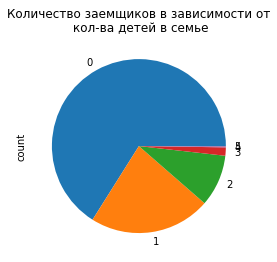

In [23]:
# график доли полученных кредитов по категориям числа детей
children_grouped['debt']['count'].plot(kind='pie', title='Количество заемщиков в зависимости от\n кол-ва детей в семье' );

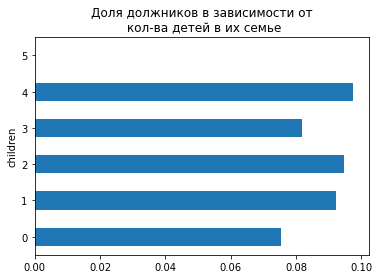

In [24]:
# график доли задолженности по категориям числа детей
children_grouped['ratio'].plot(kind='barh', title='Доля должников в зависимости от\n кол-ва детей в их семье' );

**Вывод:** Среди заемщиков банка преобладают лица, не имеющие детей. Причем с ростом числа детей в семье их доля резко падает. Число заемщиков, имеющих трех и более детей - невелико, и их стоит объединить в одну категорию. Вместе с увеличением количества детей растет среди заемщиков и доля должников: 7.5% для лиц без детей, 9.2% для лиц с одним ребенком и т.д. При этом некоторое ее снижение среди для лиц с тремя детьми и отсутствие задолженности у лиц с пятью детьми объясняется крайне малым размером выборки.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
# применение агрегирующих функций по задолженности к сгруппированным по семейному положению данным
family_status_grouped = data.groupby('family_status').agg({'debt':['sum', 'count']})
# расчет доли должников по категориям семейного положения
family_status_grouped['ratio'] = family_status_grouped['debt']['sum'] / family_status_grouped['debt']['count']
# топ-категории должников по категориям семейного положения
family_status_grouped.sort_values(by='ratio', ascending=False)

debt            ratio
                       sum  count          
family_status                              
Не женат / не замужем  273   2796  0.097639
гражданский брак       385   4134  0.093130
женат / замужем        927  12261  0.075606
в разводе               84   1189  0.070648
вдовец / вдова          63    951  0.066246

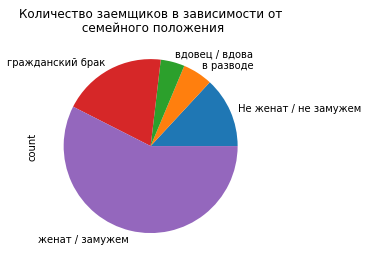

In [26]:
# график доли полученных кредитов по категориям семейного положения
family_status_grouped['debt']['count'].plot(kind='pie', title='Количество заемщиков в зависимости от\n семейного положения' );

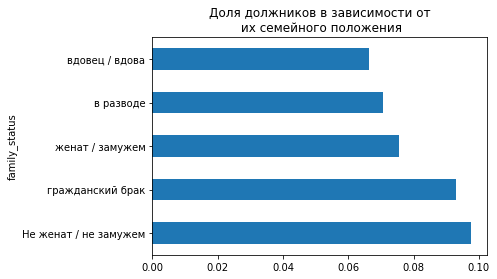

In [27]:
# график доли задолженности по категориям семейного положения
family_status_grouped['ratio'].sort_values(ascending=False).plot(kind='barh', title='Доля должников в зависимости от\n их семейного положения' );

**Вывод:** Если рассматривать признак "семейное положение" не как сетку статичных категорий, а как динамический процесс, когда по мере взросления человек проходит стадии от холостой жизни, к моменту заключения брака, разводу и далее, то обнаруживается его полная синхронизация с динамикой уменьшения доли лиц с задолжностью по кредитам. То есть, наибольшая доля должников оказывается среди холостяков 9.8%, а наименьшая - 6.6% среди вдовцов.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
# применение агрегирующих функций по задолженности к сгруппированным по размеру дохода данным
income_grouped = data.groupby('total_income_category').agg({'debt':['sum', 'count']})
# расчет доли должников по категориям размера дохода
income_grouped['ratio'] = income_grouped['debt']['sum'] / income_grouped['debt']['count']
# топ-категории должников по категориям размера дохода
income_grouped.sort_values(by='ratio', ascending=False)

debt            ratio
                        sum  count          
total_income_category                       
E                         2     22  0.090909
C                      1353  15921  0.084982
A                         2     25  0.080000
B                       354   5014  0.070602
D                        21    349  0.060172

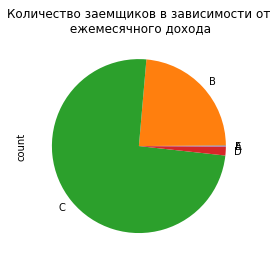

In [29]:
# график доли полученных кредитов по категориям размера дохода
income_grouped['debt']['count'].plot(kind='pie', title='Количество заемщиков в зависимости от\n ежемесячного дохода' );

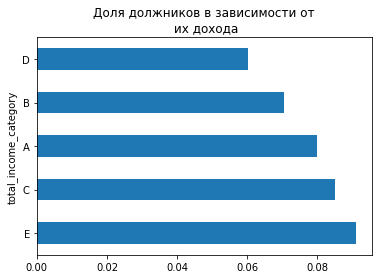

In [30]:
# график доли задолженности по категориям
income_grouped['ratio'].sort_values(ascending=False).plot(kind='barh', title='Доля должников в зависимости от\n их дохода' );

**Вывод:** Большую часть заемщиков составляют лица с высоким (от 200 000 до 1 000 000, категория "B") и средним (от 50 000 до 200 000, категория "C") ежемесячным доходом, доля их задолженности 7% и 8.4% соответственно. Лица с низким достатком (до 30 000, категория "E") редко берут кредиты, а тех, чей доход очень велик (более 1 000 000, категория "A"), просто слишком мало - выборки по ним совершенно не репрезентативны. Категория заемщиков с умеренным достатком (от 30 000 до 50 000, категория "D") также не репрезентативна. По сути, можно сказать, что разбивка на категории доходов была произведена некорректно - они оказались слишком несоразмерны. Вероятно, категории "A","B" и "D","E" стоит объеденить, а "B","C" - разбить на более мелкие.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [31]:
# применение агрегирующих функций по задолженности к сгруппированным по целям кредита данным
purpose_grouped = data.groupby('purpose_category').agg({'debt':['sum', 'count']})
# расчет доли должников по категориям цели
purpose_grouped['ratio'] = purpose_grouped['debt']['sum'] / purpose_grouped['debt']['count']
# топ-категории должников по категориям цели
purpose_grouped.sort_values(by='ratio', ascending=False)

debt            ratio
                          sum  count          
purpose_category                              
операции с автомобилем    400   4279  0.093480
получение образования     369   3988  0.092528
проведение свадьбы        183   2313  0.079118
операции с недвижимостью  780  10751  0.072551

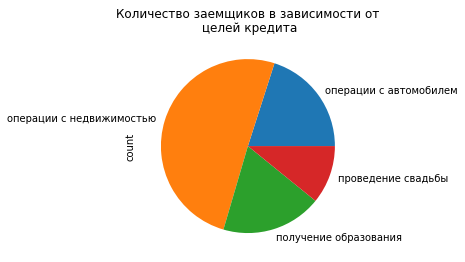

In [32]:
# график доли полученных кредитов по категориям цели
purpose_grouped['debt']['count'].plot(kind='pie', title='Количество заемщиков в зависимости от\n целей кредита' );

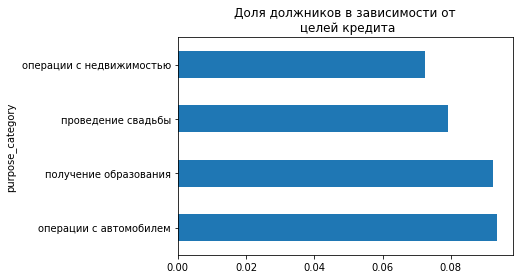

In [33]:
# график доли задолженности по категориям цели
purpose_grouped['ratio'].sort_values(ascending=False).plot(kind='barh', title='Доля должников в зависимости от\n целей кредита' );

**Вывод:** Четыре целевые кредитные группы оформились в две ценовые, со значениями в 7 и 9 с лишним % просроченных кредитов среди заемщиков. Эти две группы составили близкие по характеру целевые группы. Первую ценовую группу с 9-и %-ой долей задолженности можно условно назвать "опционной" - в ней кредиты на автомобили и образование - вещи скорее статусные и необязательные. Вторую, с 7% должников, можно назвать "сущностной". Она ориентирована на упрочение социального и семейного положения, цели кредитов - приобретение недвижимости и организацию свадеб. Из всех целевых групп самая высокая доля несвоевременных возвратов у кредитов на покупку автомобилей 9.3%, самая низкая - у кредитов на покупку недвижимости 7.3%.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски в данных наблюдаются всего у двух числовых признаках - общий трудовой стаж и ежемесячный доход. Можно предположить, что большая часть данных собиралась на основе анкетирования, тогда как эти два показателя были получены в результате расчетов - на это указывает длинная дробная часть в их значениях. Очевидно, что трудовой стаж определяться полными днями, а зарплата не может выплачиваться с точностью до милионной части рубля. Значит существует какой-то источник электронных данных, и он не может предоставить достоверные сведения о заемщике.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнение пропусков медианными значениями позволяет избавиться от влияния выбросов - редких, слишком высоких или слишком низких значений, которые в случае усреднения смещают типичиное значение, чем вызывается его неправильная оценка.

In [34]:
# функция категоризации по числу детей   
def categorize_children(childs):
    # использование конструкции try-except на случай появления аномалий в данных
    try:
        if childs == 0:
            return 'Нет детей'
        elif childs == 1:
            return 'Один ребенок'
        elif childs == 2:
            return 'Два ребенка'
        elif childs >= 3:
            return 'Три и более детей'
    except:
        return 'Число детей неизвестно'

In [35]:
# содание категориального признака по числу детей  
data['children_category'] = data['children'].apply(categorize_children)

In [36]:
# сводная таблица с категориями по семейному положению и числу детей
table = pd.pivot_table(data, index='family_status', columns='children_category', values='debt', aggfunc=['sum', 'count'])
# расчет доли должников в категориях и добавление соответствующих столбцов
table['ratio_childs_2']= table['sum']['Два ребенка'] / table['count']['Два ребенка']
table['ratio_childs_0']= table['sum']['Нет детей'] / table['count']['Нет детей']
table['ratio_childs_1']= table['sum']['Один ребенок'] / table['count']['Один ребенок']
table['ratio_childs_3']= table['sum']['Три и более детей'] / table['count']['Три и более детей']
table

sum                                           \
children_category     Два ребенка Нет детей Один ребенок Три и более детей   
family_status                                                                
Не женат / не замужем           9       210           52                 2   
в разводе                       7        55           21                 1   
вдовец / вдова                  3        53            7                 0   
гражданский брак               30       229          118                 8   
женат / замужем               145       516          246                20   

                            count                                           \
children_category     Два ребенка Нет детей Один ребенок Три и более детей   
family_status                                                                
Не женат / не замужем          75      2262          449                10   
в разводе                      81       784          312                12   
вдовец / вдова                 20       847           77                 7   
гражданский брак              343      2730          995                66   
женат / замужем              1533      7468         2975               285   

                      ratio_childs_2 ratio_childs_0 ratio_childs_1  \
children_category                                                    
family_status                                                        
Не женат / не замужем       0.120000       0.092838       0.115813   
в разводе                   0.086420       0.070153       0.067308   
вдовец / вдова              0.150000       0.062574       0.090909   
гражданский брак            0.087464       0.083883       0.118593   
женат / замужем             0.094586       0.069095       0.082689   

                      ratio_childs_3  
children_category                     
family_status                         
Не женат / не замужем       0.200000  
в разводе                   0.083333  
вдовец / вдова              0.000000  
гражданский брак            0.121212  
женат / замужем             0.070175

In [ ]:
# сводная таблица с категориями по семейному положению и числу детей
table = pd.pivot_table(data, index='family_status', columns='children_category', values='debt', aggfunc=['sum', 'count', 'mean'])

table.rename(columns={"mean": "ratio"})

### Шаг 4: общий вывод.

Основной целью исследования было разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Оказалось, что оба фактора влияют на это напрямую. Причем, в характере семейного положения просматривается своеобразная динамика - самая высокая доля просрочек по кредитам 9.7% у лиц, не состоящих в браке, средняя у людей семейных 7.5% и низкая - у вдовцов 6.6%. Казалось бы, увеличение числа детей у заемщиков - это другая сторона данного процесса. Однако, мы видим противоположную картину - наиболее кредитоспособны - лица без детей, их 7.5%, далее лица с одним ребенком - 9.2%, с двумя - 9.4%. В сводной таблице, где учитываютя оба анализируемых фактора, наиболее крупной оказалась категория лиц не состоящая в законном браке и не имеющих детей. У нее же оказался и один из самый низких уровней просрочки по кредитам 6.7%. А один из самыых высоких - у лиц, состоящих в браке и имеющих двух детей - 9.4%. Крупные выделенные категории показывают довольно высокие уровни просрочки. Самые мелкие показали противоречивые результаты.

В исследовании были рассмотрены и некоторые другие имеющиеся признаки: уровень доходов заемщика и цель кредита. В них были выявлены определенные закономерности, что позволяет предположить, что в исследование стоит включить все данные.